In [1]:
from dimod import Binary, ExactSolver
from networkx import *
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite
import numpy as np

In [2]:
def QUBO_TSP(g):
    P = sum([n[2]['w'] for n in g.edges(data=True)])
    n = len(g)
    w = np.zeros((n, n))
    for j in range(len(g)):
        for k in range(len(g)):
            if j != k:
                w[j,k] = P if not (j,k) in g.edges else g[j][k]['w']
            else:
                w[j,k] = 0
    print(w)
    P = w.sum()
    n = len(g.nodes())
    var = [[Binary(f'x{i}_{j}') for j in g] for i in range(n)]
    qubo = (sum([(var[i][j]*var[((i+1) % n)][k]*w[j,k]) if j != k else 0 for i in range(n) for j in range(n) for k in range(n)])
            #+ sum([var[0][j]*var[(n-1)][k]*w[j,k] if j != k else 0 for j in range(n) for k in range(n)])
            + sum([P * (1 - sum([var[i][j] for i in range(n)]))**2 for j in range(n)])
            + sum([P* (1 - sum([var[i][j] for j in range(n)]))**2 for i in range(n)])
           )

    return qubo

In [3]:
def obtener_sampler():
  #return ExactSolver()
    return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  #return EmbeddingComposite(DWaveSampler())

True

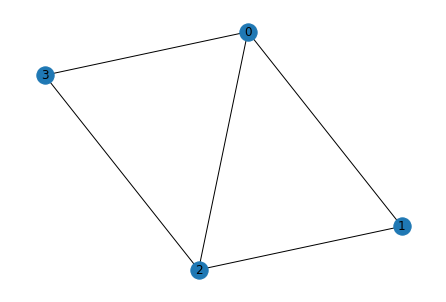

In [4]:
G = Graph()
G.add_edge(0,1, w=1)
G.add_edge(0,2, w=10)
G.add_edge(1,2, w=1)
G.add_edge(2,3, w=1)
G.add_edge(3,0, w=1)
draw(G, with_labels=True)

(1,0) in G.edges

In [5]:
qubo = QUBO_TSP(G)
#qubo.to_ising()
qubo.to_qubo()

[[ 0.  1. 10.  1.]
 [ 1.  0.  1. 14.]
 [10.  1.  0.  1.]
 [ 1. 14.  1.  0.]]


({('x1_1', 'x0_0'): 1.0,
  ('x1_2', 'x0_0'): 10.0,
  ('x1_2', 'x1_1'): 112.0,
  ('x1_3', 'x0_0'): 1.0,
  ('x1_3', 'x1_1'): 112.0,
  ('x1_3', 'x1_2'): 112.0,
  ('x0_1', 'x0_0'): 112.0,
  ('x0_1', 'x1_1'): 112.0,
  ('x0_1', 'x1_2'): 1.0,
  ('x0_1', 'x1_3'): 14.0,
  ('x1_0', 'x0_0'): 112.0,
  ('x1_0', 'x1_1'): 112.0,
  ('x1_0', 'x1_2'): 112.0,
  ('x1_0', 'x1_3'): 112.0,
  ('x1_0', 'x0_1'): 1.0,
  ('x0_2', 'x0_0'): 112.0,
  ('x0_2', 'x1_1'): 1.0,
  ('x0_2', 'x1_2'): 112.0,
  ('x0_2', 'x1_3'): 1.0,
  ('x0_2', 'x0_1'): 112.0,
  ('x0_2', 'x1_0'): 10.0,
  ('x0_3', 'x0_0'): 112.0,
  ('x0_3', 'x1_1'): 14.0,
  ('x0_3', 'x1_2'): 1.0,
  ('x0_3', 'x1_3'): 112.0,
  ('x0_3', 'x0_1'): 112.0,
  ('x0_3', 'x1_0'): 1.0,
  ('x0_3', 'x0_2'): 112.0,
  ('x2_1', 'x1_1'): 112.0,
  ('x2_1', 'x1_2'): 1.0,
  ('x2_1', 'x1_3'): 14.0,
  ('x2_1', 'x0_1'): 112.0,
  ('x2_1', 'x1_0'): 1.0,
  ('x2_2', 'x1_1'): 1.0,
  ('x2_2', 'x1_2'): 112.0,
  ('x2_2', 'x1_3'): 1.0,
  ('x2_2', 'x1_0'): 10.0,
  ('x2_2', 'x0_2'): 112.0,
  ('

In [6]:
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads=10)
print(resultado)

  x0_0 x0_1 x0_2 x0_3 x1_0 x1_1 x1_2 x1_3 x2_0 x2_1 ... x3_3 energy num_oc.
0    0    0    1    0    0    0    0    1    1    0 ...    0    4.0       1
1    0    0    1    0    0    1    0    0    1    0 ...    1    4.0       1
4    0    0    0    1    0    0    1    0    0    1 ...    0    4.0       1
5    0    1    0    0    1    0    0    0    0    0 ...    0    4.0       1
6    1    0    0    0    0    0    0    1    0    0 ...    0    4.0       1
8    1    0    0    0    0    0    0    1    0    0 ...    0    4.0       1
9    0    1    0    0    0    0    1    0    0    0 ...    0    4.0       1
2    1    0    0    0    0    0    1    0    0    1 ...    1   26.0       1
3    1    0    0    0    0    0    1    0    0    0 ...    0   26.0       1
7    0    0    1    0    0    0    0    1    0    1 ...    0   26.0       1
['BINARY', 10 rows, 10 samples, 16 variables]


In [7]:
d = resultado.lowest().first[0]
for v in d:
    if d[v]> 0:
        print(v)

x0_2
x1_3
x2_0
x3_1


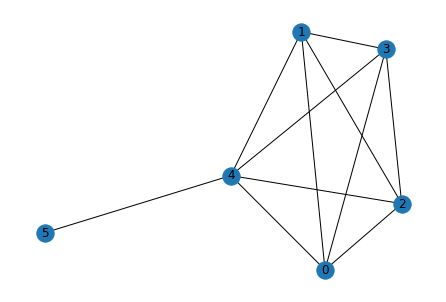

In [8]:
G = Graph()
G.add_edge(0,1, w=1)
G.add_edge(0,2, w=5)
G.add_edge(0,3, w=5)
G.add_edge(0,4, w=5)
G.add_edge(1,2, w=1)
G.add_edge(1,3, w=5)
G.add_edge(1,4, w=5)
G.add_edge(2,3, w=1)
G.add_edge(2,4, w=5)
G.add_edge(3,4, w=1)
G.add_edge(4,5, w=1)

draw(G, with_labels=True)

In [9]:
qubo = QUBO_TSP(G)

[[ 0.  1.  5.  5.  5. 35.]
 [ 1.  0.  1.  5.  5. 35.]
 [ 5.  1.  0.  1.  5. 35.]
 [ 5.  5.  1.  0.  1. 35.]
 [ 5.  5.  5.  1.  0.  1.]
 [35. 35. 35. 35.  1.  0.]]


In [10]:
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads=40)
print(resultado)

   x0_0 x0_1 x0_2 x0_3 x0_4 x0_5 x1_0 x1_1 x1_2 x1_3 ... x5_5 energy num_oc.
15    0    1    0    0    0    0    1    0    0    0 ...    0   40.0       1
25    0    0    0    1    0    0    0    0    1    0 ...    0   40.0       1
24    0    0    0    0    0    1    0    1    0    0 ...    0   44.0       1
27    1    0    0    0    0    0    0    0    0    0 ...    0   44.0       1
29    1    0    0    0    0    0    0    0    0    1 ...    0   44.0       1
1     0    0    0    1    0    0    0    1    0    0 ...    0   48.0       1
10    0    0    0    0    0    1    1    0    0    0 ...    0   48.0       1
16    0    1    0    0    0    0    1    0    0    0 ...    0   48.0       1
18    0    1    0    0    0    0    0    0    0    1 ...    0   48.0       1
22    0    0    1    0    0    0    0    0    0    1 ...    0   48.0       1
26    1    0    0    0    0    0    0    0    1    0 ...    0   48.0       1
30    0    1    0    0    0    0    1    0    0    0 ...    0   48.0       1

In [11]:
d = resultado.lowest().first[0]
for v in d:
    if d[v]> 0:
        print(v)

x0_1
x1_0
x2_5
x3_4
x4_3
x5_2
